## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

    Data Description:
        1) Murder -- Muder rates in different places of United States
        2) Assualt- Assualt rate in different places of United States
        3) UrbanPop - urban population in different places of United States
        4) Rape - Rape rate in different places of United States

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\rohit\Downloads\Assignments\data science assignment\Clustering\crime_data.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [6]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

# Hierarchical Clustering

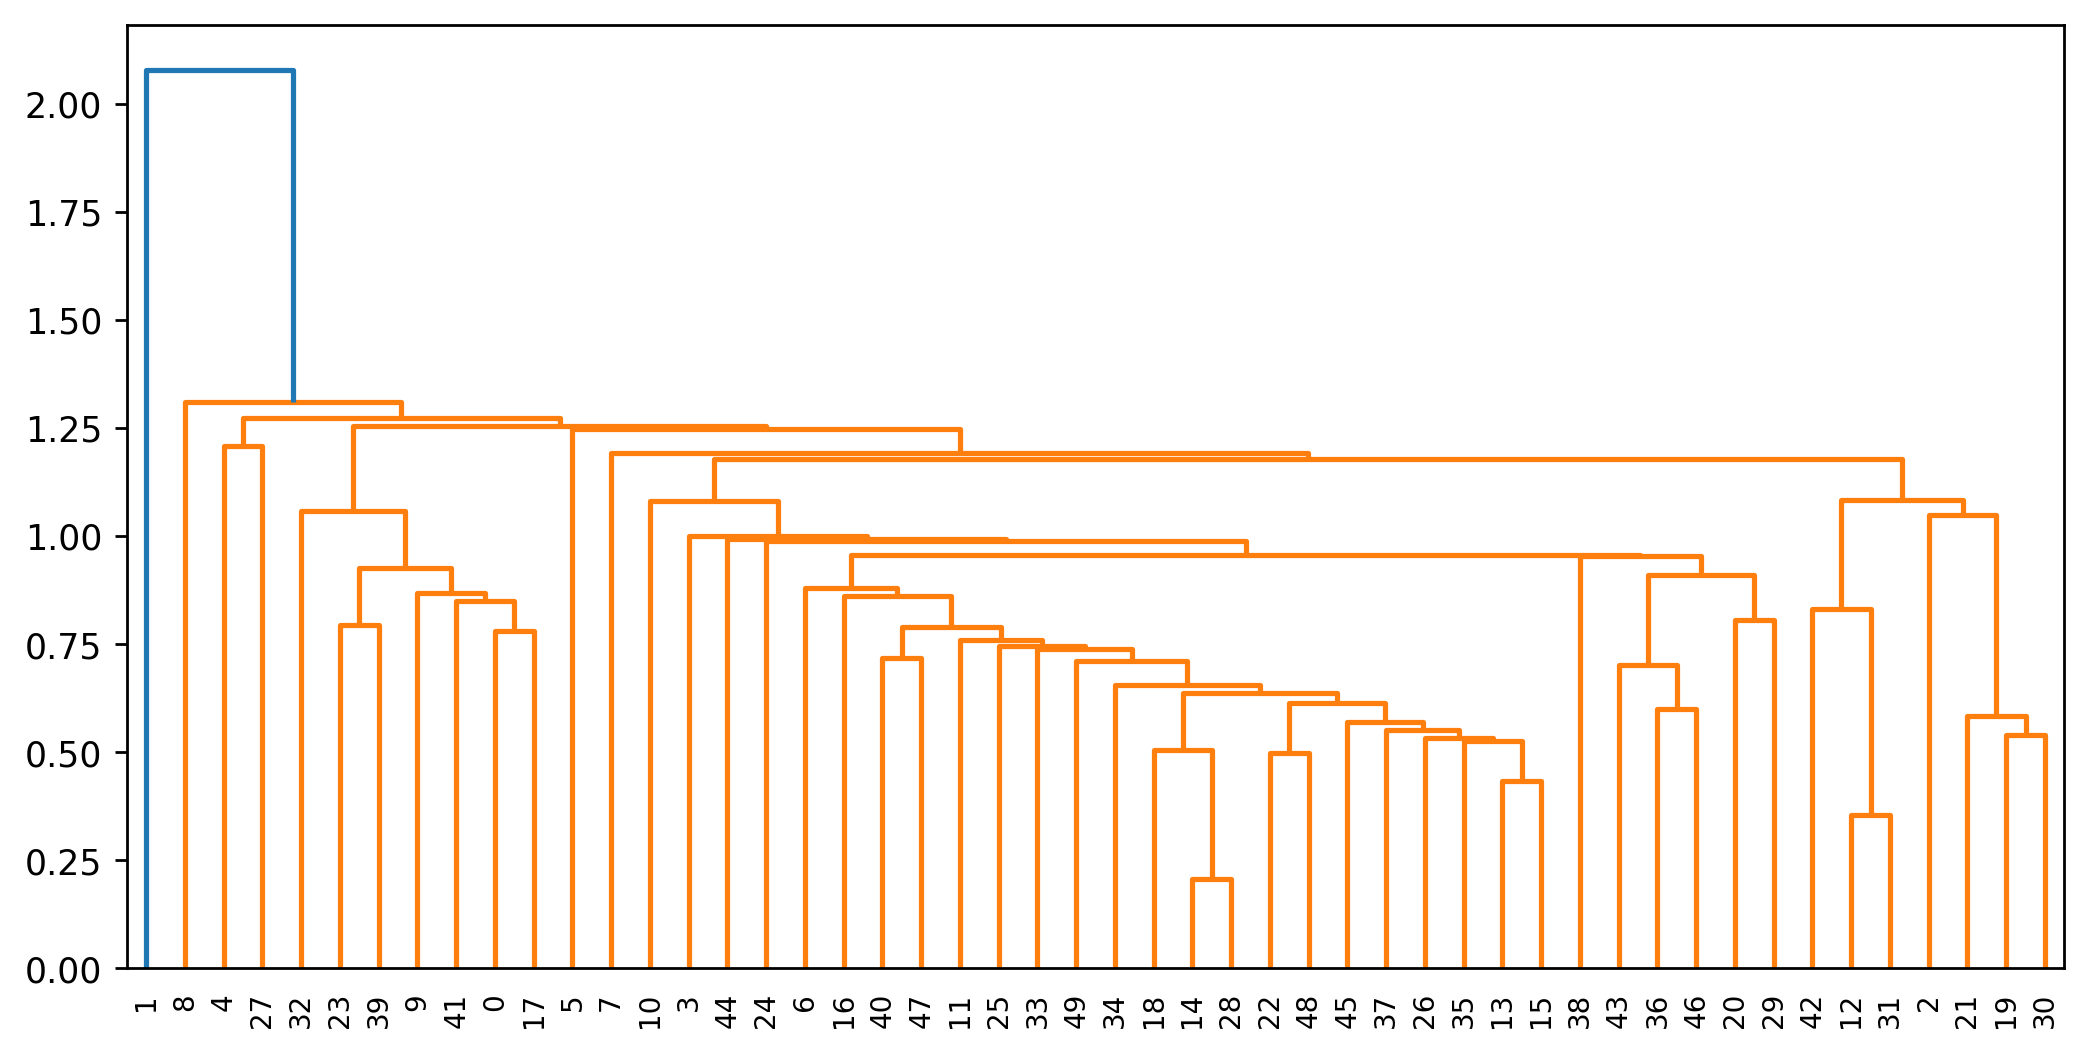

In [7]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(x)
dendo = hierarchy.dendrogram(lk)

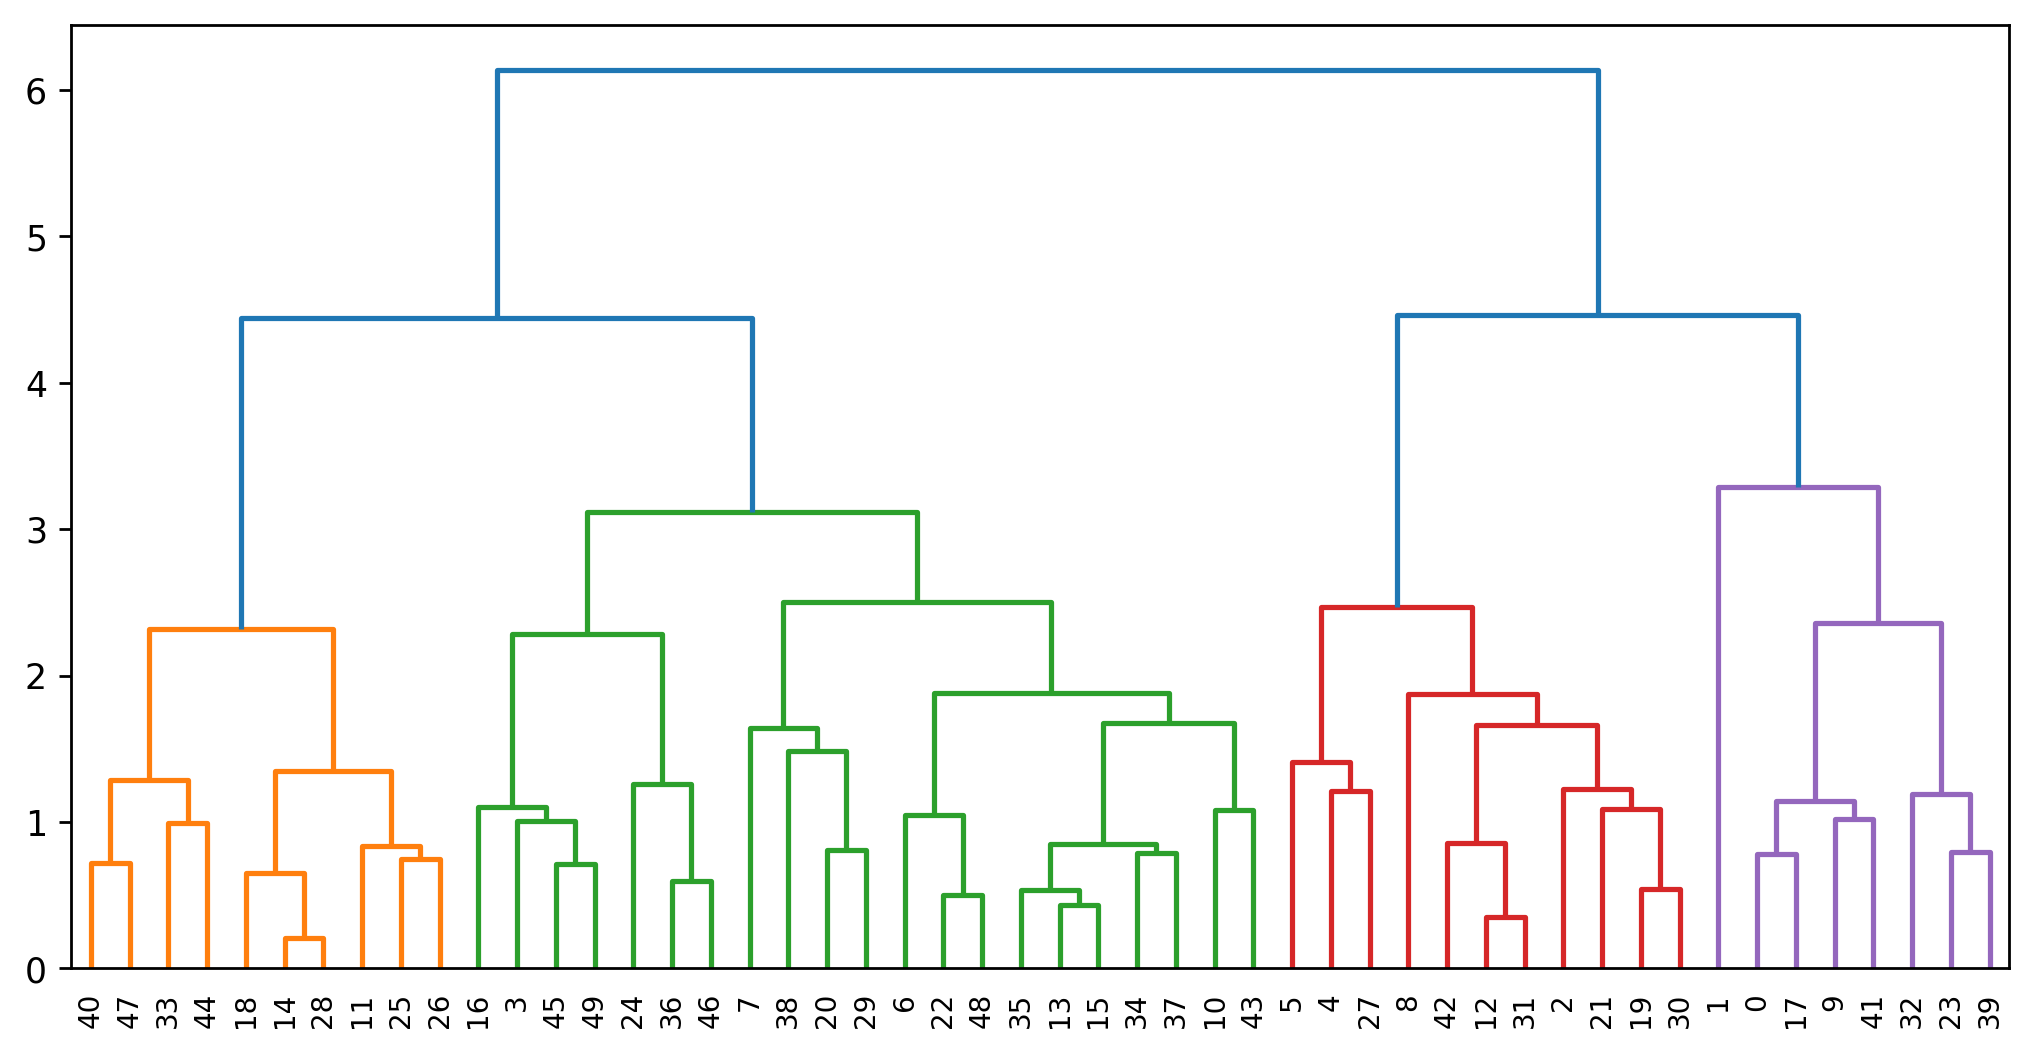

In [8]:
lk = hierarchy.linkage(x, method='complete')
dendo = hierarchy.dendrogram(lk)

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
hc = AgglomerativeClustering(n_clusters=3)
y = hc.fit_predict(x)
y

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [11]:
df['Clusters'] = y
df

,Murder,Assault,UrbanPop,Rape,Clusters
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,0


In [12]:
df['Clusters'].value_counts()

0    19
1    19
2    12
Name: Clusters, dtype: int64

In [13]:
df.groupby('Clusters').agg('mean')

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.210526,142.052632,71.263158,19.184211
2,3.091667,76.000000,52.083333,11.833333


In [14]:
df[df['Clusters'] == 1]

,Murder,Assault,UrbanPop,Rape,Clusters
Arkansas,8.8,190,50,19.5,1
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Hawaii,5.3,46,83,20.2,1
Indiana,7.2,113,65,21.0,1
Kansas,6.0,115,66,18.0,1
Kentucky,9.7,109,52,16.3,1
Massachusetts,4.4,149,85,16.3,1
Missouri,9.0,178,70,28.2,1
New Jersey,7.4,159,89,18.8,1


# KMeans

In [15]:
df.drop(columns='Clusters', inplace=True)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [16]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [17]:
from sklearn.cluster import KMeans
km = KMeans()
y1 = km.fit_predict(x)

In [18]:
x1 = pd.DataFrame(x)
x1['Clusters'] = y1
x1

,0,1,2,3,Clusters
0,1.255179,0.790787,-0.526195,-0.003451,3
1,0.513019,1.118060,-1.224067,2.509424,7
2,0.072361,1.493817,1.009122,1.053466,4
3,0.234708,0.233212,-1.084492,-0.186794,0
4,0.281093,1.275635,1.776781,2.088814,4
5,0.025976,0.402909,0.869548,1.883901,4
6,-1.040880,-0.736484,0.799761,-1.092723,2
7,-0.437875,0.815030,0.450825,-0.585834,6
8,1.765415,1.990786,1.009122,1.150530,4
9,2.229265,0.487757,-0.386621,0.492653,3


In [19]:
z1 = km.cluster_centers_
z1

array([[ 0.00858123, -0.34557544, -0.82279055, -0.4618082 ],
       [-1.16843924, -1.14052421, -0.37498964, -0.90219046],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [ 0.75759426,  1.13128272,  0.94567938,  1.22798509],
       [-1.12901195, -1.2383019 , -1.62883218, -1.24586837],
       [-0.28248491, -0.27466642,  0.24844227,  0.03429589],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

### Elbow Curve

In [20]:
# WCSS
inertia = []
for i in range(1, 15):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    inertia.append(km.inertia_)
inertia

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[199.99999999999997,
 104.96163315756871,
 79.95548163171664,
 57.55425863091105,
 50.70580774224153,
 44.420034792980026,
 40.73199198707168,
 35.56402582807611,
 32.322913458011904,
 28.97517745625375,
 25.013656899651032,
 23.67336831290392,
 21.63541576057413,
 19.727843505960585]

Text(0, 0.5, 'WCSS')

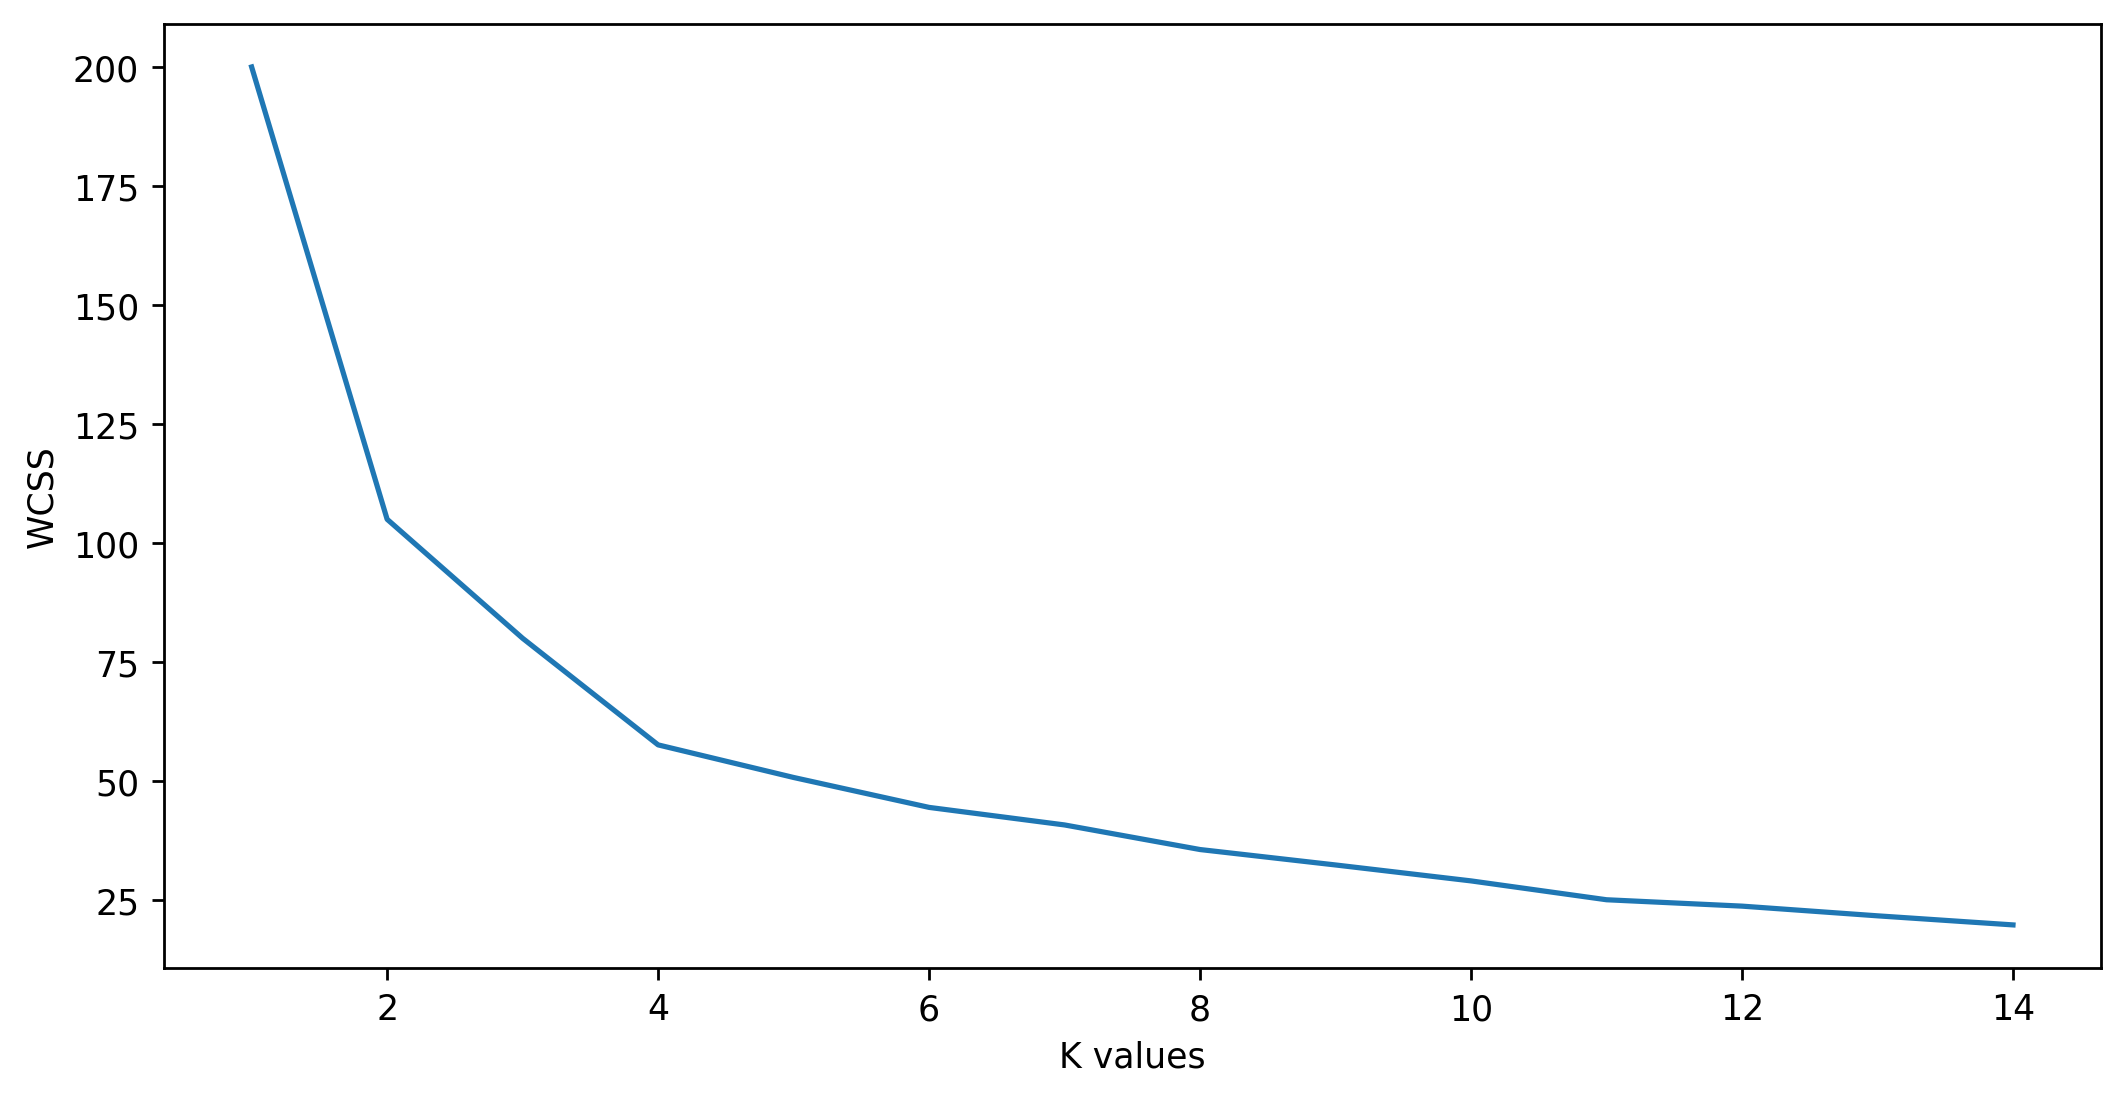

In [21]:
plt.plot(range(1,15), inertia)
plt.xlabel('K values')
plt.ylabel('WCSS')

In [22]:
km = KMeans(n_clusters=4)
y2 = km.fit_predict(x)
y2

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [23]:
x2 = pd.DataFrame(x)
x2['Clusters'] = y2
x2

,0,1,2,3,Clusters
0,1.255179,0.790787,-0.526195,-0.003451,3
1,0.513019,1.118060,-1.224067,2.509424,1
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,3
4,0.281093,1.275635,1.776781,2.088814,1
5,0.025976,0.402909,0.869548,1.883901,1
6,-1.040880,-0.736484,0.799761,-1.092723,2
7,-0.437875,0.815030,0.450825,-0.585834,2
8,1.765415,1.990786,1.009122,1.150530,1
9,2.229265,0.487757,-0.386621,0.492653,3


In [24]:
z2 = km.cluster_centers_
z2

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [25]:
df['Y'] = y2
df

,Murder,Assault,UrbanPop,Rape,Y
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,3


In [26]:
df.groupby('Y').agg('mean')

,Murder,Assault,UrbanPop,Rape
Y,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.815385,257.384615,76.000000,33.192308
2,5.656250,138.875000,73.875000,18.781250
3,13.937500,243.625000,53.750000,21.412500


In [27]:
df[df['Y'] == 1]

,Murder,Assault,UrbanPop,Rape,Y
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Florida,15.4,335,80,31.9,1
Illinois,10.4,249,83,24.0,1
Maryland,11.3,300,67,27.8,1
Michigan,12.1,255,74,35.1,1
Missouri,9.0,178,70,28.2,1
Nevada,12.2,252,81,46.0,1


# DBSCAN

In [29]:
df.drop(columns='Y', inplace=True)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [30]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

<AxesSubplot:>

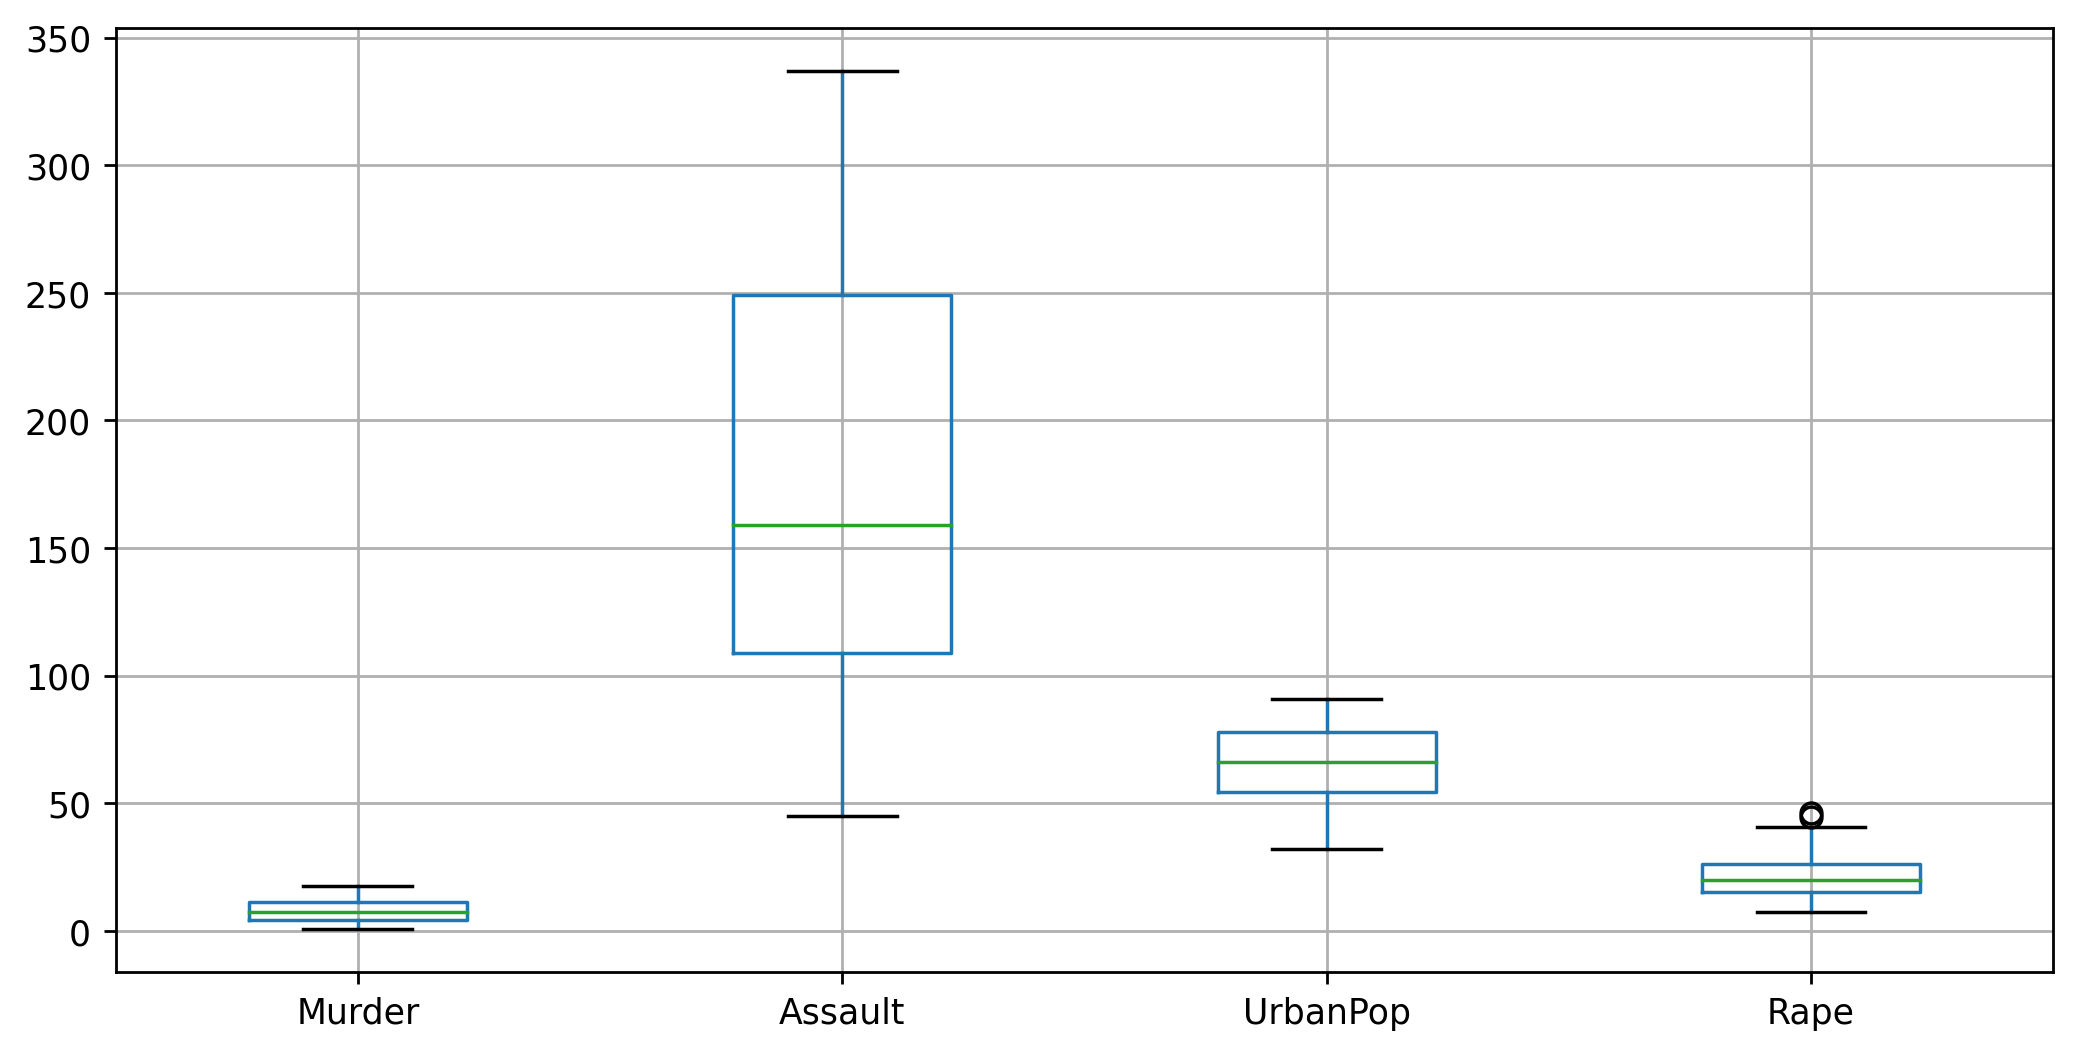

In [31]:
df.boxplot()

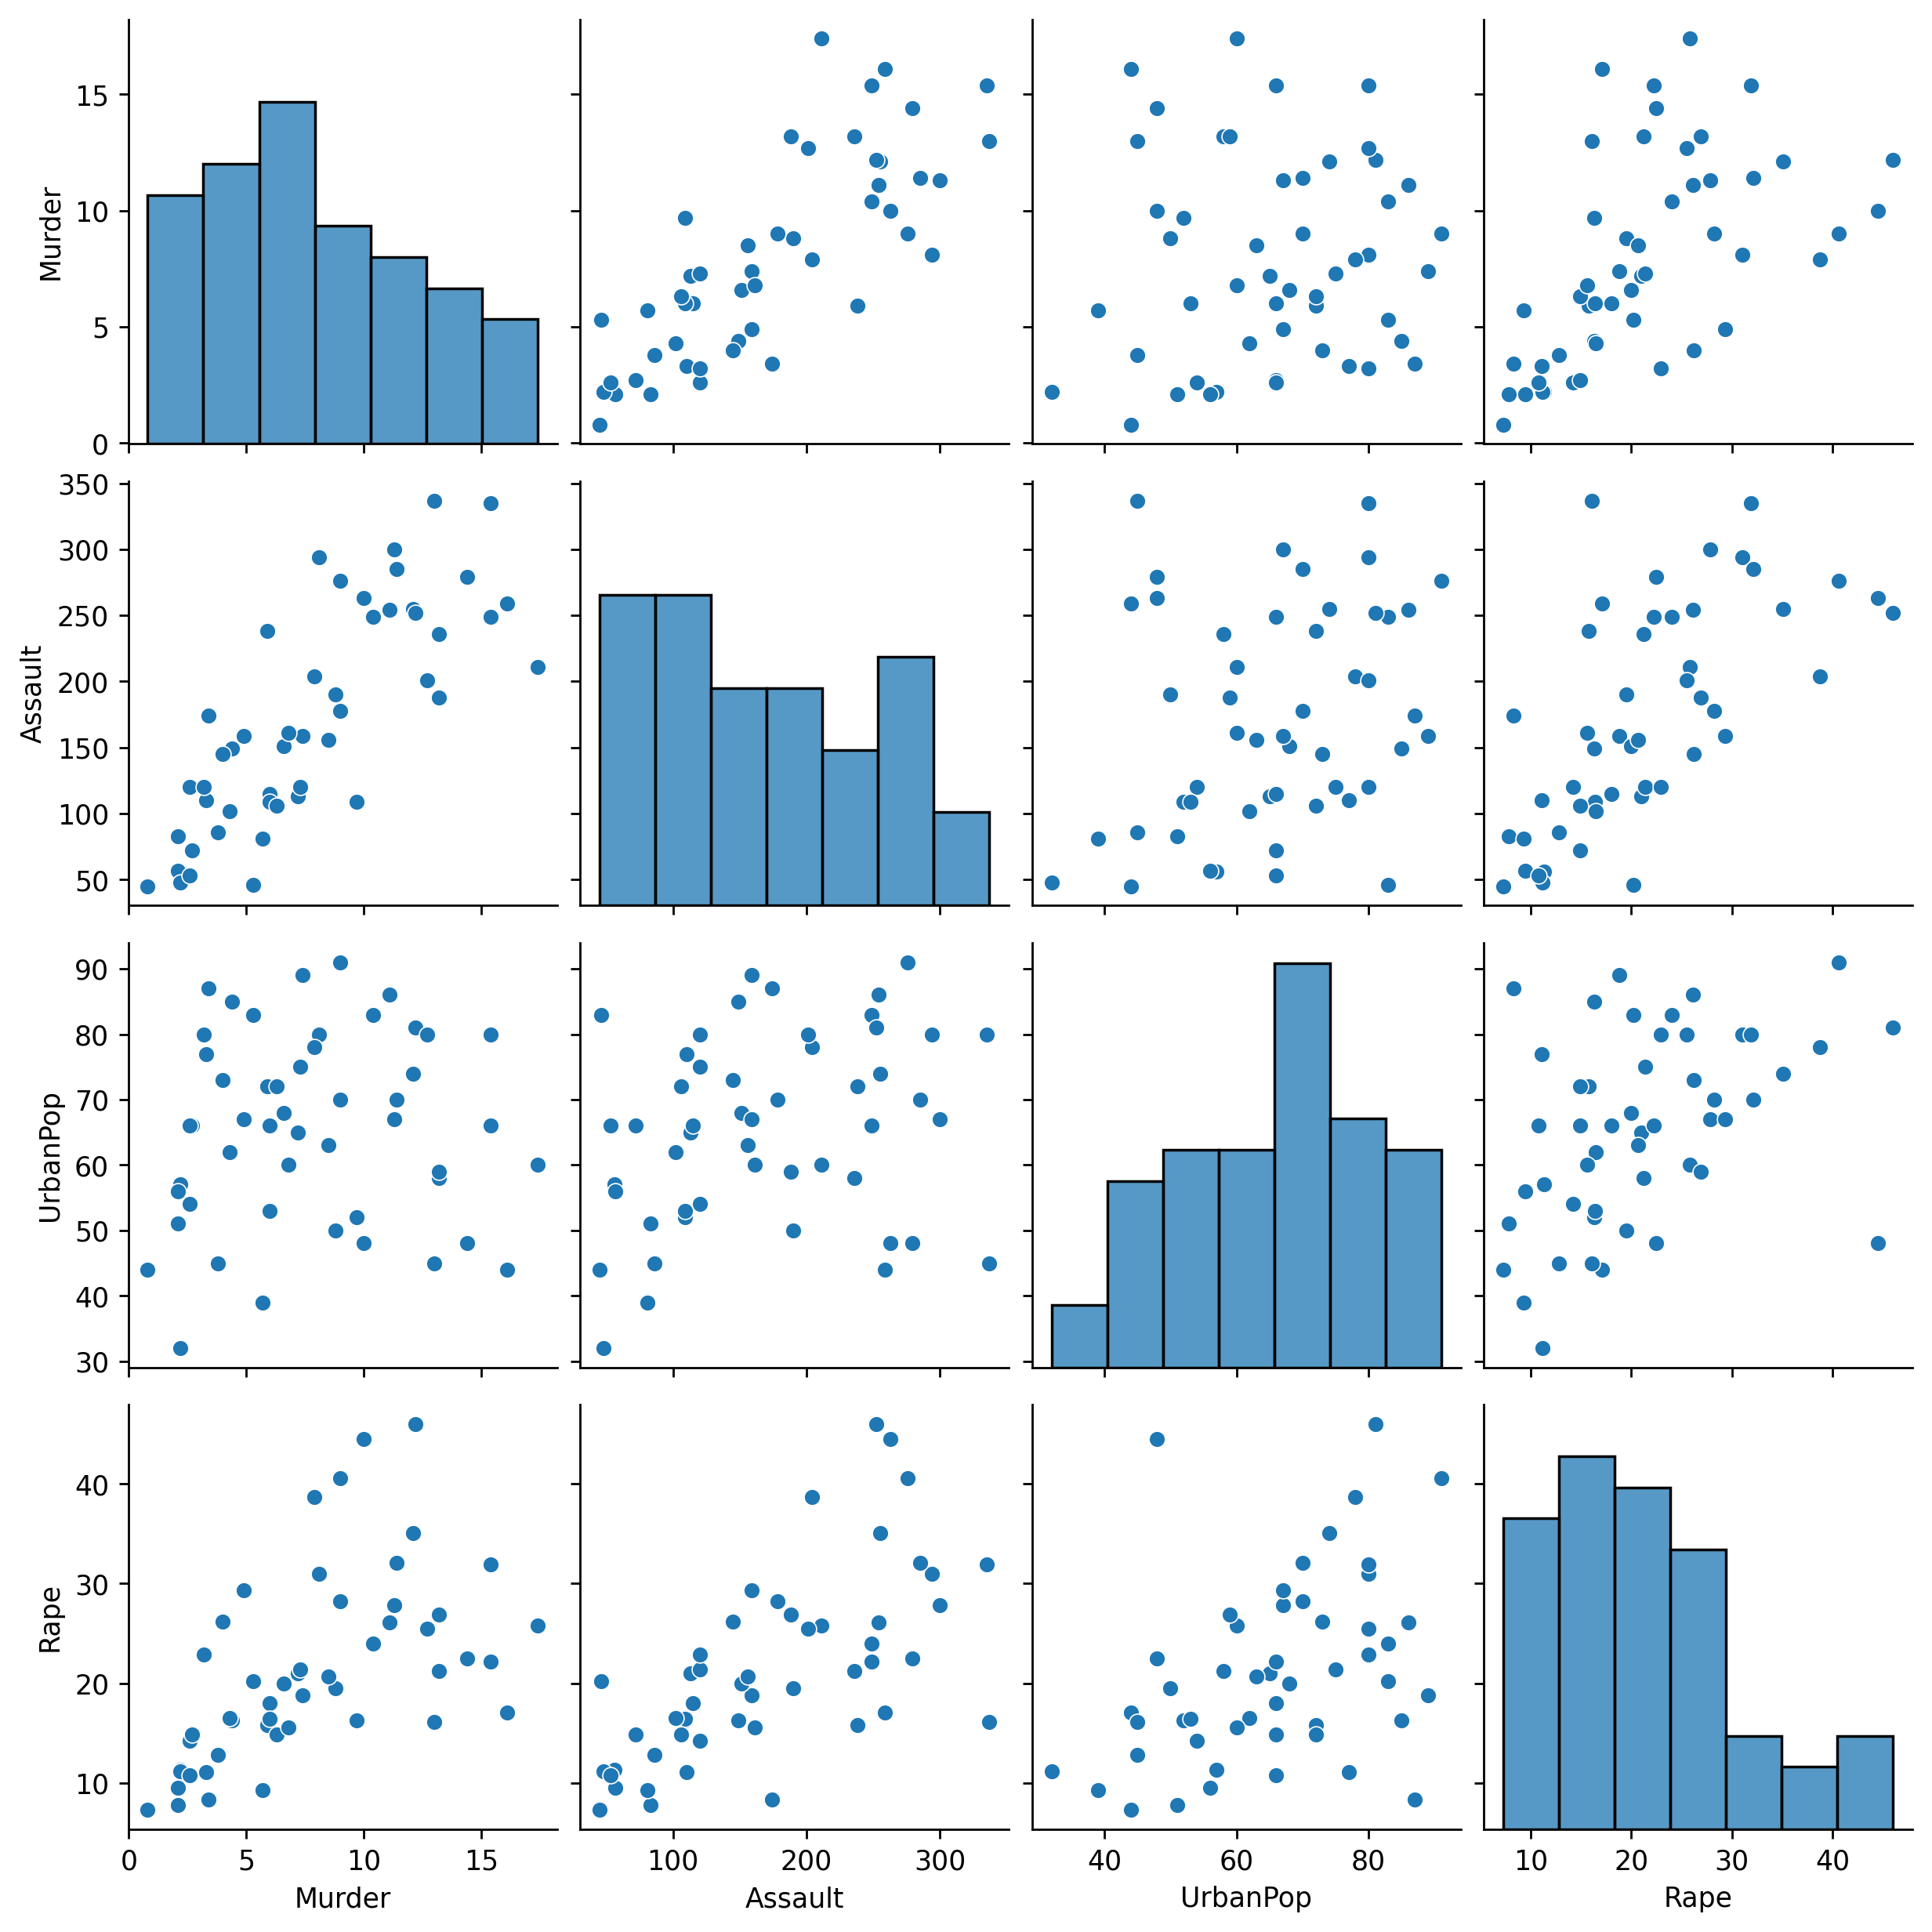

In [32]:
sns.pairplot(df)

In [38]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=5)

y3 = db.fit_predict(x)
y3

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  1, -1,  0, -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  0,
        0,  0,  0,  0,  1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [39]:
from sklearn.metrics import silhouette_score
silhouette_score(x, y3)

0.19486631995858555

In [104]:
db = DBSCAN(eps=1.2, min_samples=7)

y3 = db.fit_predict(x)
y3

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [105]:
silhouette_score(x, y3)

0.4047944502519567

In [107]:
df['Y'] = y3
df

,Murder,Assault,UrbanPop,Rape,Y
Alabama,13.2,236,58,21.2,-1
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,-1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,-1
Georgia,17.4,211,60,25.8,-1


In [110]:
df[df['Y'] == -1]

,Murder,Assault,UrbanPop,Rape,Y
Alabama,13.2,236,58,21.2,-1
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,-1
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1
Florida,15.4,335,80,31.9,-1
Georgia,17.4,211,60,25.8,-1
Illinois,10.4,249,83,24.0,-1
Louisiana,15.4,249,66,22.2,-1
Maryland,11.3,300,67,27.8,-1
